In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import cryptofxns
from matplotlib import pyplot as plt
%matplotlib inline

<img src="../FIGS/Crypto-SunetalvRothetal-Mar2017.jpeg">

In [2]:
#geno = pd.read_csv('../FILES/FiltGenotoHapFiltGeno2017-02-22.csv',index_col=0);# JUN 15th
file_end = 'min-Geno-k6000.csv'## JUN 15th
geno = pd.read_csv('../FILES/FiltGenotoHapFiltGeno-%s'%file_end)

In [3]:
geno.head()

,Alt,Chrom,Pos,Ref,SS-B307,SS-B308,SS-B310,SS-B311,SS-B312,SS-B313,...,SS-C029_Correction,SS-C031_Correction,SS-C033,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291
0,A,Chr01,5016.0,C,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,C,Chr01,5299.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,C,Chr01,5464.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
3,C,Chr01,6120.0,T,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
4,A,Chr01,6166.0,G,1,1,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [4]:
chrlist = np.unique(geno.Chrom.tolist());assert len(chrlist) == 14

In [5]:
clens = cryptofxns.chromosome_lengths;assert len(clens) == len(chrlist)

In [6]:
geno.shape

(86767, 98)

In [7]:
chr04 = geno[geno.Chrom == 'Chr04'].dropna(axis=0,how='any').reset_index(drop=True);chr04.shape

(8611, 98)

In [8]:
unim = np.arange(1,39).tolist() + [np.nan, 39, np.nan, 40, 41, 42]
bim = [np.nan,np.nan,np.nan,1,np.nan] + np.arange(2,7).tolist() + [np.nan,
            np.nan,np.nan,7,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,8,
np.nan,np.nan,9,np.nan,np.nan,np.nan,np.nan,10,11,12,np.nan,np.nan,np.nan,np.nan,np.nan,
                    np.nan] +['13al','13a'] + np.arange(14,18).tolist() + [np.nan]
                     

In [9]:
suns = [20927, 96186, 120603, 147672, 173409, 220450 , 280450 , 
 331643 , 362686 , 416408 , 468458 , 623225 , 662365 , 704101 , 784987 ,
 830051 , 854912 , 878777 , 944503 , 1096841 , 1129340 , 1203443 , 1307202 , 1365745,  1372992,
 1407510 , 1447724 , 1469659 , 1480737 , 1514191 , 1529240 , 1546466 , 1571084 , 1575936 , 1577047, 
 1584015, 1602717, 1637942, np.nan ,1661861 ,1665521 ,1693348 ,1742645 , 1779649];

In [10]:
len(suns)

44

In [11]:
sunmarkers = pd.DataFrame([suns,unim,bim]).T;sunmarkers.columns = ['Pos','Uni','Bi']
sunmarkers = sunmarkers.drop(38)
sunmarkers.to_csv('../FILES/Crypto-Sun-etal-Marker-Location-May2017.csv',index=False)

In [12]:
sunmarkers['Pos'].ix[sunmarkers['Bi'].dropna().index.tolist()]

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


3          147672
5          220450
6          280450
7          331643
8          362686
9          416408
13         704101
20        1129340
23        1365745
28        1480737
29        1514191
30        1529240
37        1637942
39        1661861
40    1.66552e+06
41        1693348
42        1742645
Name: Pos, dtype: object

In [13]:
sunmarkers ## From Sun et al 2014

,Pos,Uni,Bi
0,20927,1,NaN
1,96186,2,NaN
2,120603,3,NaN
3,147672,4,1
4,173409,5,NaN
5,220450,6,2
6,280450,7,3
7,331643,8,4
8,362686,9,5
9,416408,10,6


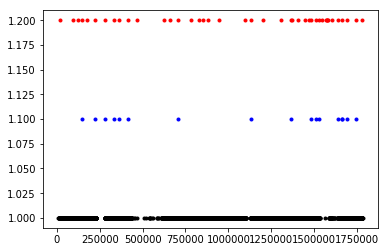

In [14]:
plt.plot(chr04.Pos.tolist(),np.ones(len(chr04.Pos.tolist())),'k.');
plt.plot(sunmarkers.Pos[sunmarkers.Uni.dropna().index],
         np.ones(len(sunmarkers.Pos[sunmarkers.Uni.dropna().index]))+.2,'r.');
plt.plot(sunmarkers.Pos[sunmarkers.Bi.dropna().index],
         np.ones(len(sunmarkers.Pos[sunmarkers.Bi.dropna().index]))+.1,'b.');

In [15]:
unim1 = sunmarkers.Pos[sunmarkers.Uni.dropna().index].dropna().tolist();
uniIMI = np.array(unim1[1:]) - np.array(unim1[:-1]);
np.median(uniIMI)

34518.0

In [16]:
bim1 = np.array(sunmarkers.Pos[sunmarkers.Bi.dropna().index].dropna().tolist())
biIMI = np.array(bim1[1:]) - np.array(bim1[:-1]);
np.median(biIMI)

52457.5

In [17]:
ch4IMI = np.array(chr04.Pos.tolist()[1:]) - np.array(chr04.Pos.tolist()[:-1]);
np.median(ch4IMI)

73.0

In [18]:
intoin = []
for pos in sunmarkers.Pos.dropna().tolist():
    Poss = [];ep = 0
    while len(Poss) == 0:
        ep = ep + 1000
        Poss = chr04.Pos[(chr04.Pos < pos + ep) & (chr04.Pos > pos - ep)].tolist()
    intoin.append(min(abs(np.array(Poss) - pos)))

In [19]:
len(intoin)

43

In [20]:
newpos = []
for i,pos in enumerate(sunmarkers.Pos.dropna().tolist()):
    if pos + intoin[i] in chr04.Pos.tolist():
        newpos.append(chr04[chr04.Pos == pos + intoin[i]].index.tolist())
    elif pos - intoin[i] in chr04.Pos.tolist():
        newpos.append(chr04[chr04.Pos == pos - intoin[i]].index.tolist())
    else:
        print "Not Good!"
newpos = np.concatenate(newpos);
assert len(newpos) == len(sunmarkers.Pos.dropna().tolist())

In [21]:
newpos

array([  10,  494,  898, 1097, 1373, 1738, 1774, 2058, 2282, 2585, 2728,
       2792, 2896, 3098, 3503, 3751, 3916, 4100, 4553, 5318, 5332, 5807,
       6357, 6700, 6780, 7028, 7266, 7368, 7411, 7623, 7687, 7692, 7693,
       7694, 7694, 7694, 7713, 7725, 7761, 7767, 7924, 8292, 8568])

In [22]:
newchr04 = chr04.ix[newpos,:].reset_index(drop=True)

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [23]:
newchr04

,Alt,Chrom,Pos,Ref,SS-B307,SS-B308,SS-B310,SS-B311,SS-B312,SS-B313,...,SS-C029_Correction,SS-C031_Correction,SS-C033,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291
0,G,Chr04,20879.0,A,0,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,1
1,T,Chr04,96219.0,C,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,1,1
2,G,Chr04,120631.0,A,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,1,1
3,G,Chr04,147457.0,A,0,0,1,0,0,0,...,0,0,1,1,0,1,0,1,1,1
4,T,Chr04,173410.0,G,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,1
5,C,Chr04,219537.0,T,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,1,1
6,T,Chr04,280310.0,A,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,1,1
7,T,Chr04,331499.0,C,0,0,1,0,1,1,...,0,0,1,0,0,0,1,1,0,0
8,A,Chr04,362721.0,G,0,0,1,0,1,1,...,0,0,1,0,0,0,1,1,0,0
9,T,Chr04,416387.0,C,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0


## Count the number of corss overs

In [24]:
biindex = sunmarkers.Bi.dropna().index.tolist()

In [25]:
print len(biindex);print biindex

17
[3, 5, 6, 7, 8, 9, 13, 20, 23, 28, 29, 30, 37, 39, 40, 41, 42]


In [26]:
unindex = sunmarkers.Uni.dropna().index.tolist()
print len(unindex);print unindex

42
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43]


In [27]:
temp = newchr04['SS-B308']

In [28]:
tempco = sum(abs(np.array(temp.tolist()[1:]) - np.array(temp.tolist()[:-1])))

In [29]:
segs_bi = list(np.concatenate(cryptofxns.axalp))

In [30]:
seg_out = [ "SS-B377", # nearly identical to SS-B312
            "SS-B385", # nearly identical to SS-B317
            "SS-B410", # nearly identical to SS-B314
            "SS-B560", # nearly identical to SS-B308
            "SS-B395", # Disomy of Chr01 and nearly identical to SS-B395
            "SS-B411", # Disomy of Chr01 and nearly identical to SS-B411
            "SS-B594", # Disomy of Chr01
            "SS-C273", # Disomy of Chr07
            "SS-B879", # Disomy of Chr10 
            "SS-B885", # Disomy of Chr10
            "SS-B593", # Non-recombinant All chrom from XL280 except Chr07
            #"SS-B358" , # Next Lowest amount of recombination N = 20
            #"SS-B874_cor", # Next Lowest amount of recombination N = 20
]

In [31]:
segstemp = newchr04.columns.tolist()[4:]

In [32]:
segs = [seg for seg in segstemp if seg not in seg_out]

In [33]:
un = [];bi = [];seg_out = []
for seg in segs:
    if seg not in segs_bi:
        un.append(seg)
    elif seg in segs_bi:
        bi.append(seg)
    else:
        seg_out.append(seg)

In [34]:
len(seg_out)

0

In [35]:
len(un)

55

In [36]:
len(bi)

39

In [37]:
def countX(df,segs,markers):
    COs = []
    sub = df.ix[markers,:]
    assert len(sub) == len(markers)
    for seg in segs:
        temp = sub[seg].dropna().tolist();
        tempco = sum(abs(np.array(temp[1:]) - np.array(temp[:-1])))
        COs.append(tempco)
    return COs

In [38]:
unCO = countX(newchr04,un,unindex)
biCO = countX(newchr04,bi,biindex)
myunCO = countX(chr04,un,chr04.index.tolist())
mybiCO = countX(chr04,bi,chr04.index.tolist())

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


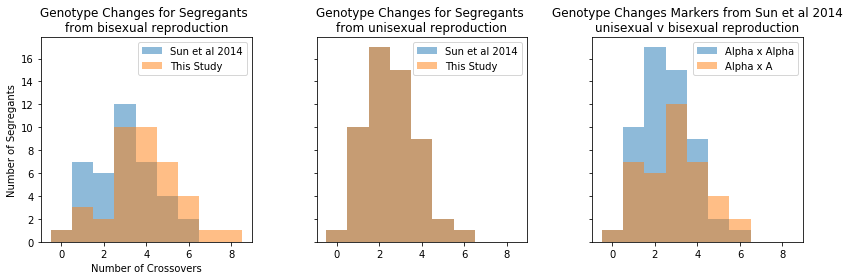

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4),sharex=True,sharey=True);
mybins = np.arange(0-0.5, 8+1.5)
past = 'Sun et al 2014';pres = 'This Study';
ax1.hist(biCO,bins=mybins,alpha=.5,label=past);
ax1.hist(mybiCO,bins=mybins,alpha=.5,label=pres);
ax1.set_xlabel('Number of Crossovers');
ax1.set_ylabel('Number of Segregants');
ax1.legend();
ax2.hist(unCO,bins=mybins,alpha=.5,label=past);
ax2.hist(myunCO,bins=mybins,alpha=.5,label=pres);ax2.legend();
ax3.hist(unCO,bins=mybins,alpha=.5,label='Alpha x Alpha');
ax3.hist(biCO,bins=mybins,alpha=.5,label='Alpha x A');ax3.legend();
ax1.set_title('Genotype Changes for Segregants \nfrom bisexual reproduction');
ax2.set_title('Genotype Changes for Segregants \nfrom unisexual reproduction');
ax3.set_title('Genotype Changes Markers from Sun et al 2014\nunisexual v bisexual reproduction');
plt.tight_layout();
fig.savefig('../FIGS/Crypto-Roth-v-Sun-Distribution-Chr04-Apr2017.png')

In [40]:
np.mean(unCO)

2.5636363636363635

In [41]:
np.mean(biCO)

2.9487179487179489

In [42]:
ss.ks_2samp(unCO,biCO)

Ks_2sampResult(statistic=0.15011655011655006, pvalue=0.64643397470359909)

In [43]:
ss.ks_2samp(myunCO,mybiCO)

Ks_2sampResult(statistic=0.37156177156177161, pvalue=0.0025023033401473378)

In [44]:
changed_segsin = []
for i,diff in enumerate(np.array(mybiCO) - np.array(biCO)):
    if diff > 0:
        changed_segsin.append(i)

In [45]:
changed_segsin

[15, 16, 19, 21, 22, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]

In [46]:
len(changed_segsin)

18

In [47]:
changed_segs = [bi[a] for a in changed_segsin]

In [48]:
changed_segs

['SS-B908_Correction',
 'SS-B926',
 'SS-B930',
 'SS-B956',
 'SS-B960_Correction',
 'SS-B997',
 'SS-B998',
 'SS-C026_Correction',
 'SS-C029_Correction',
 'SS-C031_Correction',
 'SS-C033',
 'SS-C036',
 'SS-C039',
 'SS-C242',
 'SS-C271',
 'SS-C272',
 'SS-C290',
 'SS-C291']

## I've changed the segs name in the "correction"

In [49]:
changed_segs[0]

'SS-B908_Correction'

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


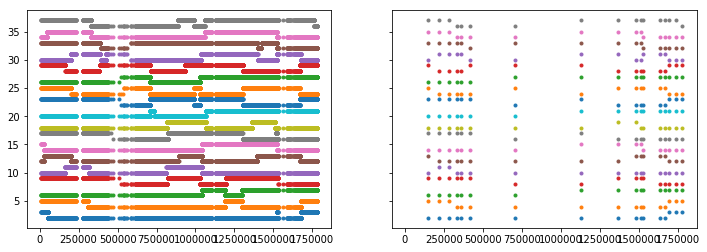

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True);
pos1 = chr04.Pos.tolist();
pos2 = newchr04.Pos.ix[biindex].tolist();
for i,seg in enumerate(changed_segs):
    temp1 = np.array(chr04[seg].tolist()) + (2*i + 2);
    ax1.plot(pos1,temp1,'.');
    temp2 = np.array(newchr04[seg].ix[biindex].tolist()) + (2*i + 2);
    ax2.plot(pos2,temp2,'.');
#fig.savefig("../FIGS/Crypto-Markers-Sheng-Mar2017.png",dpi=600)

## Make haplotypes for the set of Sheng's markers

In [51]:
hap_filter_size = 6000
HAPFILTINT = int(hap_filter_size/1000.0)
Method = '-min'
fileendname = Method +'-haplotype-k' + str(int(hap_filter_size)) + '.csv'

In [52]:
old_hapdfs = []
for s,seg in enumerate(changed_segs):
    sub = newchr04[['Pos',seg]].ix[biindex]
    #sub = geno_ch[['Pos',seg]].dropna(axis=0,how='any').reset_index(drop=True); ## Drop empty markers
    subpos = sub.Pos.tolist();
    subgt = sub[seg].tolist();
    if len(subgt) == 0:
        continue
    ## make IMI dataframe 
    subimi = pd.DataFrame();
    subimi['v'] = subpos[:-1];
    subimi['w'] = subpos[1:];
    subimi['X'] = abs(np.array(subgt[:-1]) - np.array(subgt[1:]));
    subimi['M'] = [np.mean((subimi.w[i],subimi.v[i])) for i in subimi.index.tolist()]; ## Midpoint Method
    #subimi.to_csv(FILECHRPATHS[ch][0] + seg + '-IMI' + '.csv',
    #                  index=False);
    ## Find break pts dataframe. 
    bp = subimi[subimi.X != 0].dropna(axis=0,how='any');
    #bp.to_csv(FILECHRPATHS[ch][1] + seg  + '-breakpt' + '.csv',
    #          index=False);
    ## Make haplotype dataframe. 
    hapdf = cryptofxns.haplotypes(subimi,clens[3],method=Method);
    hapdf['genotype'] = [ss.mode(sub[seg][(sub.Pos >= hapdf.v[i]) & 
                                              (sub.Pos <= hapdf.w[i])])[0].tolist()[0] 
                             for i in hapdf.index.tolist()]
    old_hapdfs.append(hapdf)
    #hapdf.to_csv(FILECHRPATHS[ch][2] + seg +'-'+ Method +'-haplotype' '.csv',
     #                index=False);
        

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
subimi.head()

,v,w,X,M
0,147457.0,219537.0,0,183497.0
1,219537.0,280310.0,0,249923.5
2,280310.0,331499.0,1,305904.5
3,331499.0,362721.0,0,347110.0
4,362721.0,416387.0,0,389554.0


In [54]:
ch04IMIs = [cryptofxns.IMI(subimi.v[i],subimi.w[i]) for i in subimi.index.tolist()]

In [55]:
chromNsnps = [];ws = 10e3;chromNwins = [];
for ch,chrom in enumerate(chrlist):
    sub = geno[geno.Chrom == chrom];Nsnps = [];
    windows = range(0,int(clens[ch]+ws),int(ws));
    for i in range(len(windows)-1):
        Nsnps.append(len(sub.Pos[(sub.Pos >= windows[i])&(sub.Pos <= windows[i+1])]));
    chromNsnps.append(Nsnps);chromNwins.append(windows);

In [56]:
FILECHRPATHS = cryptofxns.FILECHRPATHS;
HAPFILES = [f[2] for f in FILECHRPATHS];

In [57]:
old_changed_segs = []
for seg in changed_segs:
    if len(seg.split('_')) > 1:
        old_changed_segs.append(seg.split('_')[0]+'_cor')
    else:
        old_changed_segs.append(seg)

In [58]:
import os
from os import listdir
hapdfs = [];
for ch, chrom in enumerate(chrlist):
    dfs = []
    for seg in old_changed_segs:
        path = HAPFILES[ch] + seg + '/' + seg + fileendname
        if os.path.exists(path):
            dfs.append(pd.read_csv(path))
    hapdfs.append(dfs)

In [59]:
len(hapdfs[3])

18

In [60]:
len(old_hapdfs)

18

In [61]:
chr4hapdf = hapdfs[3]
chr4Nwins = chromNwins[3]
chr4Nsnps = chromNsnps[3]

In [62]:
centromere = cryptofxns.load_centrom_locs()
clens = cryptofxns.chromosome_lengths

In [63]:
chr4cent = centromere.ix['Chr04']
chr4lens = clens[3]

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [64]:
def set_colors(gt,cl = ['lightblue','orange']):
    colors = []
    for i in gt:
        if i == 0:
            colors.append(cl[0]);
        else:
            colors.append(cl[1]);
    return colors

In [65]:
from matplotlib import gridspec

In [66]:
import math
def my_round(N,myadd=0,myden=100.0):
    return math.ceil((N + myadd)/myden) * myden

## Make wood floor plots for the shared segregants that have changed COs

In [168]:
mats = cryptofxns.mats#mats = 1529240
matst = cryptofxns.matst#matst = 1661861

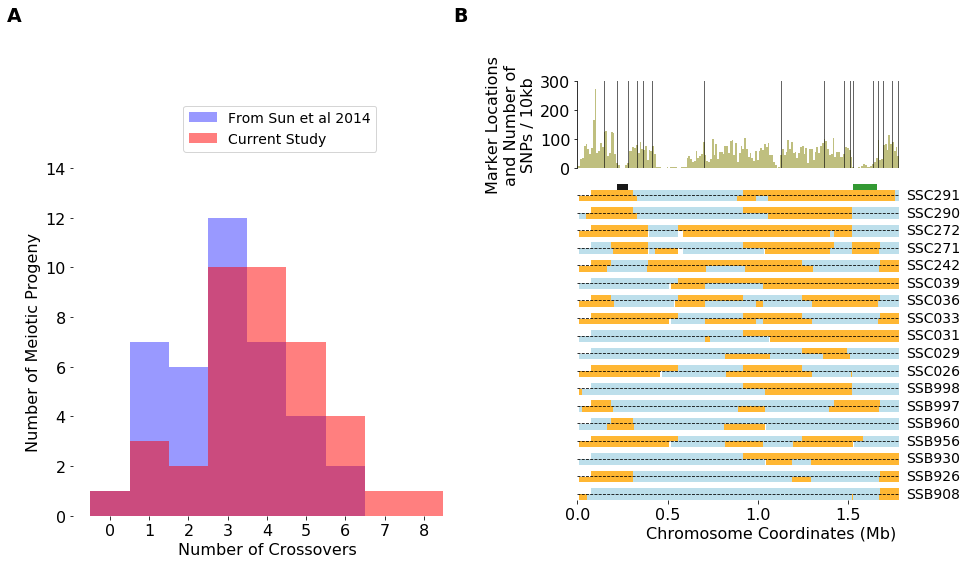

In [273]:
fig = plt.figure(figsize=(16,8));
chrom = 'Chr04';ws=10e3
past = 'From Sun et al 2014'
pres = 'Current Study'
gs = gridspec.GridSpec(2,2,width_ratios=[1,1], height_ratios=[1,4]);
ax0 = fig.add_subplot(gs[1]) ## SNP density
ax1 = fig.add_subplot(gs[0]) ## Blank
ax2 = fig.add_subplot(gs[3]) ## Haplotypes
ax3 = fig.add_subplot(gs[2]) ## Histograms
ax3.hist(biCO,bins=mybins,alpha=.4,label=past,color='blue');
ax3.hist(mybiCO,bins=mybins,alpha=.5,label=pres,color='red');
ax3.set_xlabel('Number of Crossovers',fontsize=16);
ax3.set_ylabel('Number of Meiotic Progeny',fontsize=16);
ax3.set_xticks(np.arange(9))
ax3.set_xticklabels(np.arange(9),fontsize=16)
ax3.set_yticks(np.arange(0,15,2))
ax3.set_yticklabels(np.arange(0,15,2),fontsize=16)
ax3.legend(fontsize=14,bbox_to_anchor=(0.8, 1.2));
ax3.set_ylim(0,14);
ax3.set
## SNP DENSITY (the SNP data)
ax0.bar(chromNwins[3][:-1],chromNsnps[3],width=ws,alpha=.5,color='olive');
ax0.set_ylabel('Marker Locations\nand Number of\nSNPs / %skb'%int(ws/1e3),fontsize=16);
ax0.spines['left'].set_position(('data', 0))
ax0.set_yticks(np.arange(0,350,100))
ax0.set_yticklabels(np.arange(0,350,100),fontsize=16)
SNP_max = my_round(max(chromNsnps[3]));
assert SNP_max > max(chromNsnps[3])
ax0.set_ylim(-1,SNP_max);
## The marker positions form Sun et al 2014
for pos in newchr04['Pos'].ix[biindex].tolist():
    #ax1.vlines(x=pos,ymin=0,ymax=.5,linewidth=.5);
    ax0.vlines(x=pos,ymin=0,ymax=500,linewidth=.6);
HY1 = 0
HY2 = 3
dy = HY2
d = HY2*2 + dy
distan = np.arange(0,d*len(chr4hapdf)+d,d)
for s, seg in enumerate(chr4hapdf):
    seg2 = old_hapdfs[s]
    x1 = zip(seg.v.tolist(),[nbs - 1 for nbs in seg.nb.tolist()]);
    x2 = zip(seg2.v.tolist(),[nbs - 1 for nbs in seg2.nb.tolist()]);
    fcolors1 = set_colors(seg.genotype.tolist());
    fcolors2 = set_colors(seg2.genotype.tolist());
    segname = 'SS'+old_changed_segs[s].split('-')[1]
    ax2.broken_barh(x1,[HY1+distan[s],dy],facecolors=fcolors1,alpha=.8);
    ax2.broken_barh(x2,[HY2+distan[s],dy],facecolors=fcolors2,alpha=.8);
    ax2.hlines(y=HY2+distan[s]+.25,xmin=-1000,xmax=clens[3],linestyles='--',color='black',linewidth=.8)
    ax2.annotate(segname.split('_')[0],(clens[3]+40000,HY2+distan[s]-1.75),fontsize=14) ## The Names of each segregant
ax2.broken_barh([(mats,matst-mats)],(distan[-1]-HY2,dy),facecolors='g',alpha =.8);
ax2.broken_barh([(centromere[0][chrom],centromere[1][chrom]-centromere[0][chrom])],
                    (distan[-1]-HY2,dy),facecolors='k',alpha =.9);
## Turn off axis 
ax2.spines["left"].set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines['bottom'].set_position(('data', 0))
ax2.set_frame_on(False)
ax3.set_frame_on(False)
## Turn off axis 
#ax3.spines["left"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(True)
## Turn off axis 
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
## Turn off axis
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.axis('off')
ax0.set_xlim(0,clens[3]+370050);
ax1.set_xlim(0,clens[3]+370050);
ax2.set_xlim(0,clens[3]+370050);
ax2.set_xticks(np.arange(0,clens[3],500000))
ax2.set_xticklabels(np.arange(0,2,.5),fontsize=16)
ax2.set_xlabel('Chromosome Coordinates (Mb)',fontsize=16);
ax2.spines['bottom'].set_bounds(0,clens[3])
plt.sca(ax1)
ax1.text(-0.15, 1.75,'A', horizontalalignment='center',
                 verticalalignment='center',
                 transform = plt.gca().transAxes,fontsize=19,fontweight='bold')
plt.sca(ax0)
plt.text(-0.3, 1.75,'B', horizontalalignment='center',
                 verticalalignment='center',
                 transform = plt.gca().transAxes,fontsize=19,fontweight='bold')
gs.update(wspace=0.3,hspace=0.001);
fig.savefig('../FIGS/Crypto-10-Roth-v-Sun-Feb2018.png',dpi=1200,bbox_inches='tight')

In [ ]:
chrom = 'Chr04';ws=10e3
fig = plt.figure(figsize=(6,10));
gs = gridspec.GridSpec(4,1,width_ratios=[1], height_ratios=[1,.3,.35,2]);
ax0 = fig.add_subplot(gs[2])#(gs[0]);
ax1 = fig.add_subplot(gs[1]);
ax2 = fig.add_subplot(gs[3]);
ax3 = fig.add_subplot(gs[0]);#(gs[3])
past = 'From Sun et al 2014'
pres = 'Current Study'
ax3.hist(biCO,bins=mybins,alpha=.4,label=past,color='blue');
ax3.hist(mybiCO,bins=mybins,alpha=.4,label=pres,color='Maroon');
ax3.set_xlabel('Number of Crossovers',fontsize=16);
ax3.set_ylabel('Number of Segregants',fontsize=16);
ax3.set_xticks(np.arange(9))
ax3.set_xticklabels(np.arange(9),fontsize=16)
ax3.set_yticks(np.arange(0,15,2))
ax3.set_yticklabels(np.arange(0,15,2),fontsize=16)
ax3.legend(fontsize=12,bbox_to_anchor=(0.5, 0.9));
ax3.set_ylim(0,14);
## SNP DENSITY (the SNP data)
ax0.bar(chromNwins[3][:-1],chromNsnps[3],width=ws,alpha=.5,color='olive');
ax0.set_ylabel('Marker\nLocations\nand\nNumber\nof SNPs\n/ %skb'%int(ws/1e3),fontsize=13);
ax0.spines['left'].set_position(('data', 0))
ax0.set_yticks(np.arange(0,350,100))
ax0.set_yticklabels(np.arange(0,350,100),fontsize=12)
#ax1.set_ylabel('Marker Locations\nSun et al.',fontsize=7);
SNP_max = my_round(max(chromNsnps[3]));
assert SNP_max > max(chromNsnps[3])
ax0.set_ylim(-1,SNP_max);
## The marker positions form Sun et al 2014
for pos in newchr04['Pos'].ix[biindex].tolist():
    #ax1.vlines(x=pos,ymin=0,ymax=.5,linewidth=.5);
    ax0.vlines(x=pos,ymin=0,ymax=500,linewidth=.6);
ax1.set_ylim(0,100)
#ax1.set_ylim(0,1);
#ax1.set_title('Marker\nLocations');
#ax1.yaxis.set_label_position("left")
mod = 1;
for s, seg in enumerate(chr4hapdf):
    x = zip(seg.v.tolist(),[nbs - 1 for nbs in seg.nb.tolist()]);
    fcolors = set_colors(seg.genotype.tolist());
    ax2.broken_barh(x,[s+mod,1],facecolors=fcolors,alpha=.8);
    segname = 'SS'+old_changed_segs[s].split('-')[1]
    ax2.annotate(segname.split('_')[0],(-300000,s+mod+.5),fontsize=12) ## The Names of each segregant
    ax2.hlines(y=s+mod+1.2,xmin=-1000,xmax=clens[3],linestyles='--',color='black',linewidth=.8)
    seg = old_hapdfs[s]
    x = zip(seg.v.tolist(),[nbs - 1 for nbs in seg.nb.tolist()]);
    fcolors = set_colors(seg.genotype.tolist());
    ax2.broken_barh(x,[s+mod+1.2,1],facecolors=fcolors,alpha=.8);
    mod = mod +2;
ax2.broken_barh([(mats,matst-mats)],(s+mod,1),facecolors='g',alpha =.6);
ax2.broken_barh([(centromere[0][chrom],centromere[1][chrom]-centromere[0][chrom])],
                    (s+mod,1),facecolors='k',alpha =.6);
## Turn off axis 
ax2.spines["left"].set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_frame_on(False)
## Turn off axis 
#ax3.spines["left"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
## Turn off axis 
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
## Turn off axis
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
#ax1.set_yticklabels([])
ax1.axis('off')
#ax1.annotate('Marker\nLocations',(-150000,.35),rotation=90,fontsize=7)
gs.update(wspace=0.01,hspace=0.01);
ax0.set_xlim(-370050,clens[3]);
ax1.set_xlim(-370050,clens[3]);
ax2.set_xlim(-370050,clens[3]);
#ax3.set_xlim(-370050,clens[3]);
#fig.savefig('../FIGS/Crypto-Roth-v-Sun-Apr2017.png',dpi=1200)

In [ ]:
35/219.0

In [ ]:
140.0/219

In [ ]:
len(chr04)

In [ ]:
mats

In [ ]:
matst

In [ ]:
matlocus = chr04[(chr04.Pos >= mats)&(chr04.Pos <= matst)]

In [ ]:
bis =np.concatenate(cryptofxns.axalp)

In [ ]:
bis

In [ ]:
mybisegs = []
mybisegs_mt = []
for seg in matlocus.columns.tolist()[4:]:
    if seg in bis:
        matcode = np.median(matlocus[seg].values)
        if matcode == 0:
            mattype = 'alpha'
        elif matcode == 1:
            mattype = 'a'
        else:
            print "Error"
        print seg,mattype
        mybisegs.append(seg)
        mybisegs_mt.append(matcode)
    else:
        pass

In [ ]:
chr04['SS-C273']